In [133]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display,HTML

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [6]:
data=pd.read_csv('players_21.csv')

In [7]:
data.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


# Total number of players 

In [13]:
data.shape[0]

18944

In [14]:
skills=[]
for i in data.columns:
    skills.append(i)

In [15]:
skills

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name',
 'league_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed

In [23]:
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

# Selecting specific number of attributes to process data and analyse based on that features. 

In [33]:
fill_values=data.loc[:,['pace','shooting','passing','dribbling','defending','physic']]

for i in fill_values.columns:
    data[i].fillna(data[i].mean(),inplace=True)

In [34]:
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

# Plotting player count based on their heights

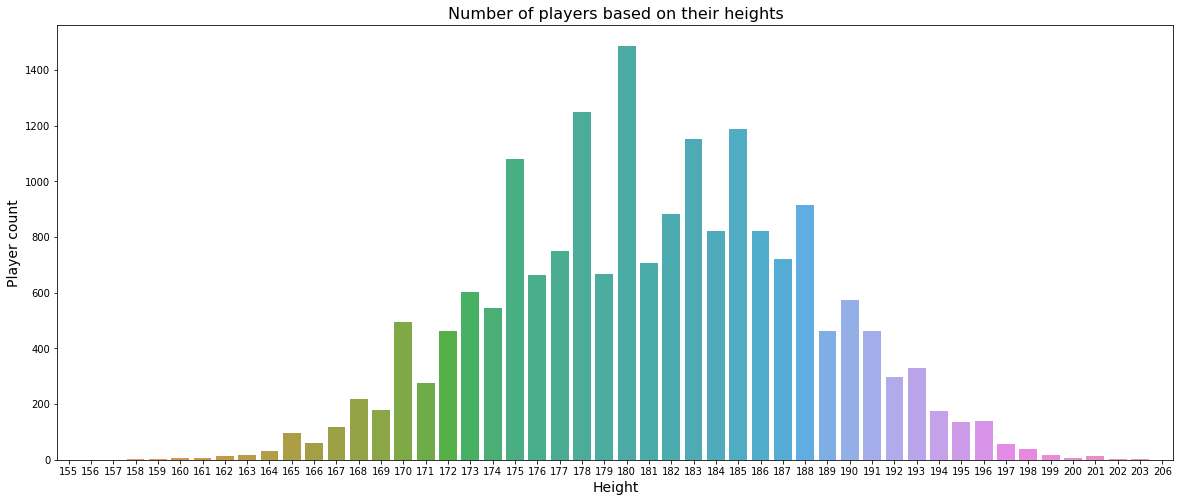

In [38]:
plt.figure(figsize=(20,8))
ax=sns.countplot(x='height_cm',data=data)
ax.set_title(label="Number of players based on their heights",fontsize=16)
ax.set_xlabel(xlabel='Height',fontsize=14)
ax.set_ylabel(ylabel='Player count',fontsize=14)
plt.show()

In [39]:
# Most number of players are of height 180 CM (player count=1500)

# Plotting Height vs Dribbling

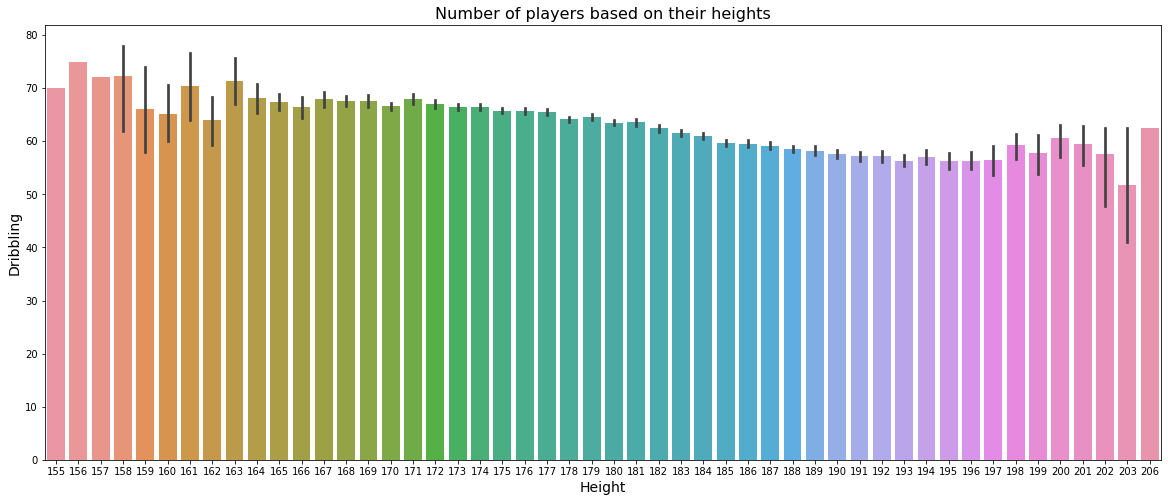

In [41]:
plt.figure(figsize=(20,8))
hd=sns.barplot(x='height_cm',y='dribbling',data=data)
hd.set_title(label="Number of players based on their heights",fontsize=16)
hd.set_xlabel(xlabel='Height',fontsize=14)
hd.set_ylabel(ylabel='Dribbling',fontsize=14)
plt.show()

# Plotting Weight vs Dribbling

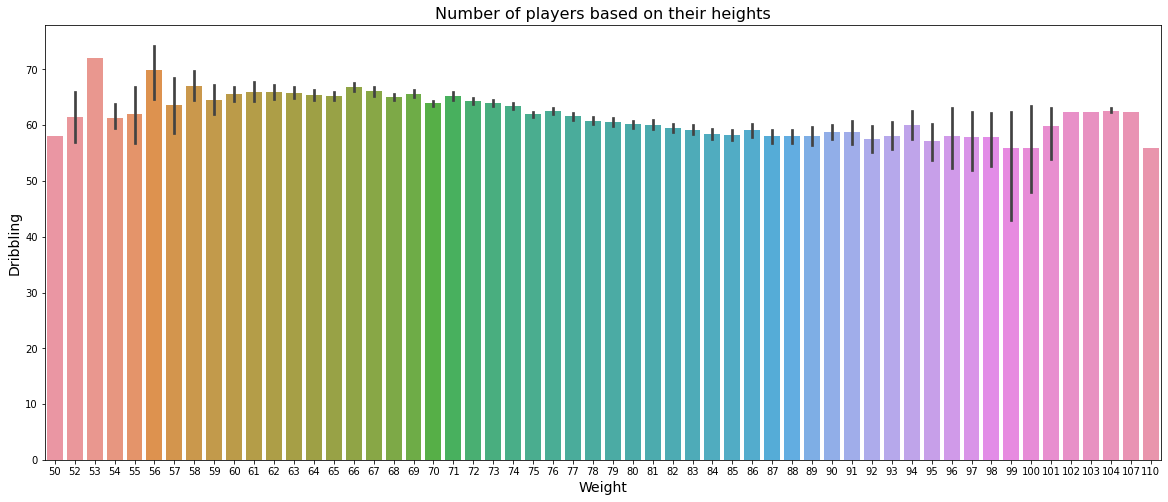

In [55]:
plt.figure(figsize=(20,8))
wd=sns.barplot(x='weight_kg',y='dribbling',data=data)
wd.set_title(label="Number of players based on their heights",fontsize=16)
wd.set_xlabel(xlabel='Weight',fontsize=14)
wd.set_ylabel(ylabel='Dribbling',fontsize=14)
plt.show()

# Messi vs Ronaldo

In [67]:
skills=['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

In [68]:
messi=data.loc[data['short_name']=='L. Messi']
messi=pd.DataFrame(messi,columns=skills)

ronaldo=data.loc[data['short_name']=='Cristiano Ronaldo']
ronaldo=pd.DataFrame(ronaldo,columns=skills)

In [66]:
ronaldo

,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
1,89.0,93.0,81.0,89.0,35.0,77.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93


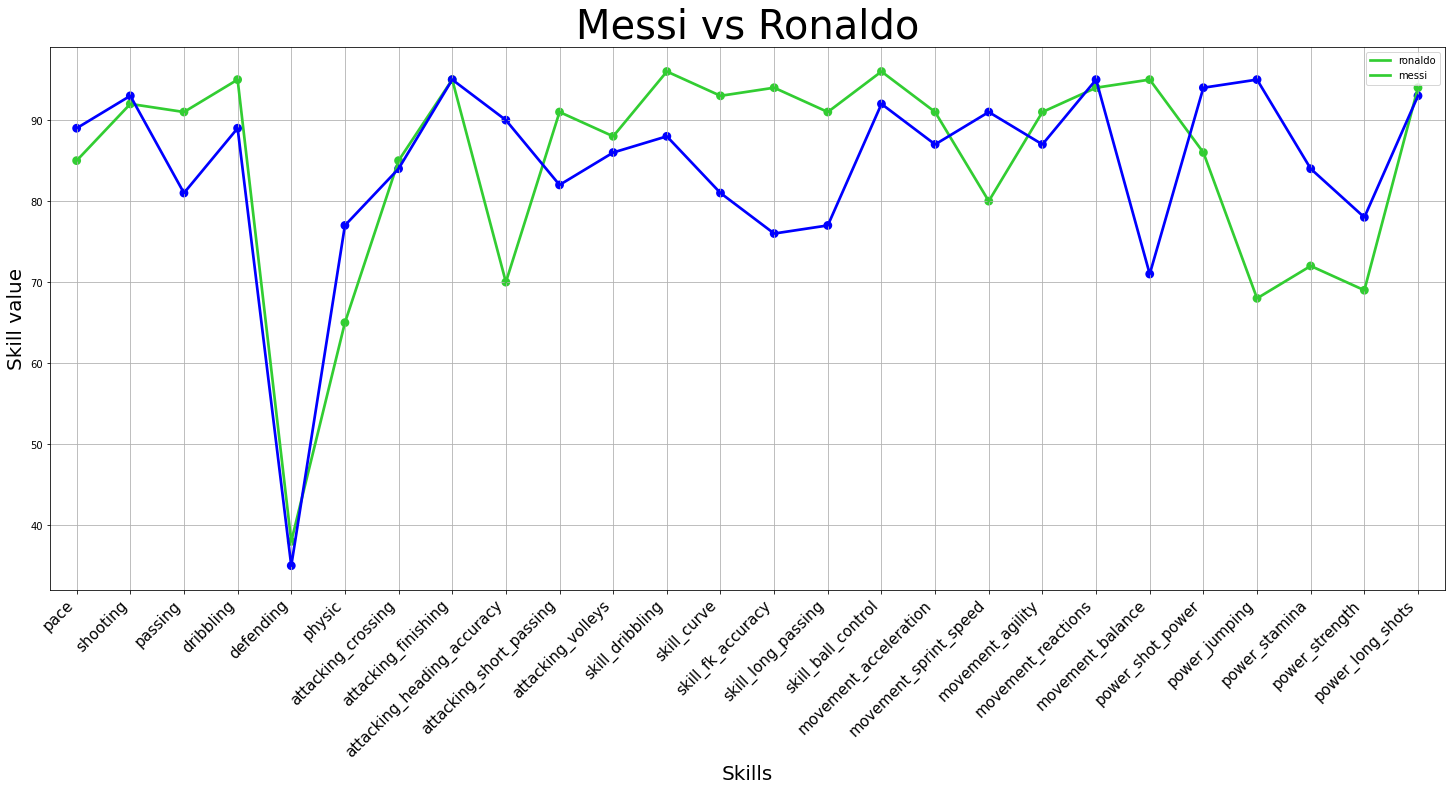

In [88]:
plt.figure(figsize=(25,10))
sns.pointplot(data=messi,color='limegreen')
sns.pointplot(data=ronaldo,color='blue')
plt.title('Messi vs Ronaldo',fontsize=40)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=15
)

plt.xlabel(xlabel='Skills',fontsize=20)
plt.ylabel(ylabel='Skill value',fontsize=20)
plt.legend(['ronaldo','messi'])
plt.grid()

# Top 10 players based on Overall skills

In [92]:
display(
    HTML(data.sort_values('overall',ascending=False)[['short_name','overall']][:10].to_html(index=False))
)

short_name,overall
L. Messi,93
Cristiano Ronaldo,92
J. Oblak,91
R. Lewandowski,91
Neymar Jr,91
K. De Bruyne,91
Alisson,90
S. Mané,90
M. Salah,90
V. van Dijk,90


# Top 5 Nations with overall best players

In [94]:
top_nations=data.groupby(['nationality'])['overall'].max().sort_values(ascending=False).head(5)

In [95]:
top_nations


nationality
Argentina    93
Portugal     92
Belgium      91
Brazil       91
Slovenia     91
Name: overall, dtype: int64

# Top 5 clubs with overall best players

In [97]:
top_clubs=data.groupby(['club_name'])['overall'].max().sort_values(ascending=False).head(5)

In [112]:
top_clubs

club_name
FC Barcelona           93
Juventus               92
Paris Saint-Germain    91
Manchester City        91
Atlético Madrid        91
Name: overall, dtype: int64

# Age Distributiuon of players in Countries

In [106]:
countries=['Argentina',
'Portugal',
'Belgium',
'Brazil',
'Slovenia']

countries_data=data.loc[data['nationality'].isin(countries)]

In [107]:
countries_data.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.00000,92.000000,91.000000,95.00000,38.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.00000,93.000000,81.000000,89.00000,35.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,67.66811,52.274954,57.139434,62.45543,51.316292,64.458988,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.00000,85.000000,86.000000,94.00000,36.000000,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,6

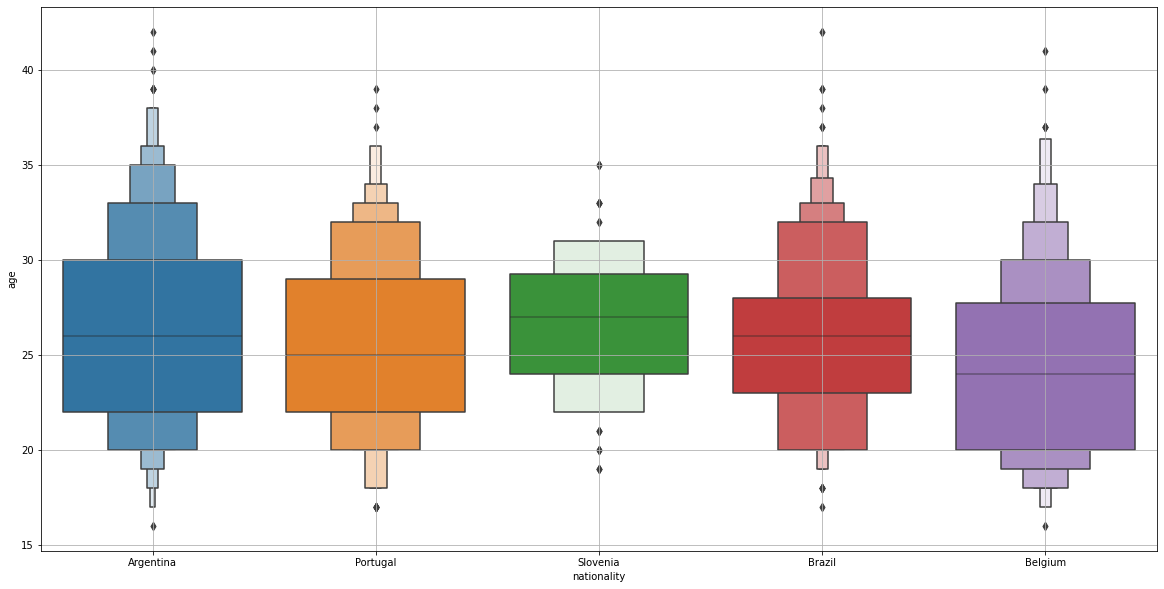

In [110]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
ax=sns.boxenplot(x='nationality',y='age',data=countries_data)
plt.grid()

# Age Distributiuon of players in Countries

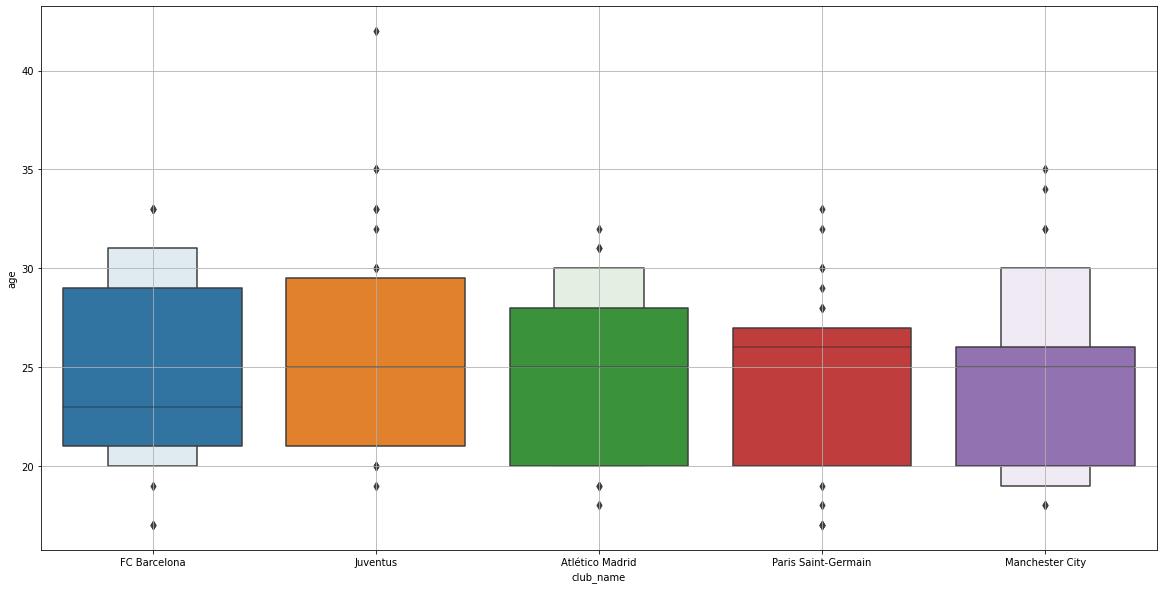

In [113]:
clubs=['FC Barcelona','Juventus','Paris Saint-Germain','Manchester City','Atlético Madrid']
club_data=data.loc[data['club_name'].isin(clubs)]

fig,ax=plt.subplots()
fig.set_size_inches(20,10)
ax=sns.boxenplot(x='club_name',y='age',data=club_data)
plt.grid()

In [140]:
best_avg_overall=data.groupby('nationality').apply(lambda x:np.mean(x['overall'])).reset_index(name='Nationwise Overall')
nation_count=data.groupby('nationality').apply(lambda x:x['overall'].count()).reset_index(name='Nationwise Count')
merge=pd.merge(best_avg_overall,nation_count,how='inner',left_on='nationality',right_on='nationality')
best_avg_top=merge[merge['Nationwise Count']>=200]
best_avg_top.sort_values(by=['Nationwise Overall','Nationwise Count'],ascending=False)
px.scatter(best_avg_top,x='Nationwise Overall',y='Nationwise Count',color='Nationwise Count',hover_data=['nationality'])

In [147]:
best_avg_overall.head(10)

,nationality,Nationwise Overall
0,Afghanistan,66.000000
1,Albania,65.224490
2,Algeria,70.807692
3,Andorra,62.000000
4,Angola,69.312500
5,Antigua & Barbuda,62.000000
6,Argentina,67.793803
7,Armenia,71.500000
8,Aruba,68.000000
9,Australia,61.360996


In [146]:
nation_count.head(10)

,nationality,Nationwise Count
0,Afghanistan,2
1,Albania,49
2,Algeria,52
3,Andorra,1
4,Angola,16
5,Antigua & Barbuda,4
6,Argentina,936
7,Armenia,4
8,Aruba,1
9,Australia,241


In [128]:
merge.head(10)

,nationality,Nationwise Overall,Nationwise Count
0,Afghanistan,66.000000,2
1,Albania,65.224490,49
2,Algeria,70.807692,52
3,Andorra,62.000000,1
4,Angola,69.312500,16
5,Antigua & Barbuda,62.000000,4
6,Argentina,67.793803,936
7,Armenia,71.500000,4
8,Aruba,68.000000,1
9,Australia,61.360996,241


# Top Footballers in Fifa 21 Game

In [144]:
top_play=data[['short_name','overall','age','club_name']]
top_play.sort_values(by='overall',ascending=False,inplace=True)
top_100_play=top_play[:100]
fig=px.scatter(top_100_play,x='age',y='overall',color='age',size='overall',hover_data=['short_name','club_name'])
fig.show()

<ipython-input-144-463939e724f0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Thank You